<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231030_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 통계적 머신러닝

    - 차원축소 / 군집

        pca

        KMeans

        군집평가, DBSCAN

    - 텍스트 처리

        NLP, BOW

        텍스트 분류

        감성분석(시간)

        문서유사도

2. 딥러닝

    - ANN

    - 경사하강법

    - 오차역전파

    - Optimizer

    - CNN

    - ResNet

    - RNN, LSTM, GRU


|자동차이름|디자인|기능성|디자인+기능성|디자인-기능성|
|----|----|----|----|----|
|v|40|90|130|-50|
|A|90|40|130|50|
|C|70|70|140|0|

x = 디자인

y = 기능성

$\psi_1$ = ax + by, (a=1, b= -1) => x - y, [-50, 50, 0]

$\psi_2$ = ax + by, (a=1, b= 1) => x + y, [130, 130, 140]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

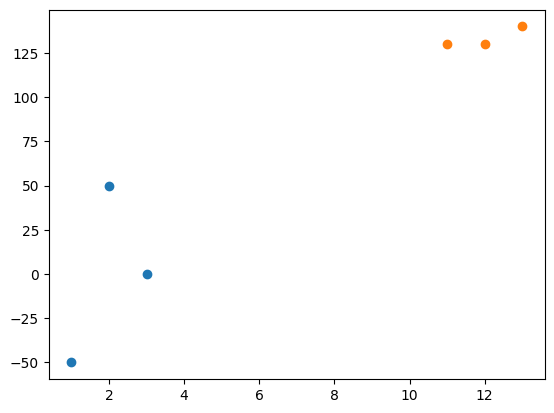

In [ ]:
plt.scatter([1, 2, 3], [-50, 50, 0])
plt.scatter([11, 12, 13], [130, 130, 140])

#PCA

(Principal Component Analysis)

차원 축소 : 데이터를 대표하는 주성분을 추출해 차원을 축소 하는 기법

즉,  feature 의 개수를 줄여 간다.

주성분 : 데이터들의 변동성을 가장 높게 해주는 축

$$\psi = a x+ b y$$
$$ $$
$$ where, a^2 + b^2 = 1$$

조작 : $\psi = x - 100000y$

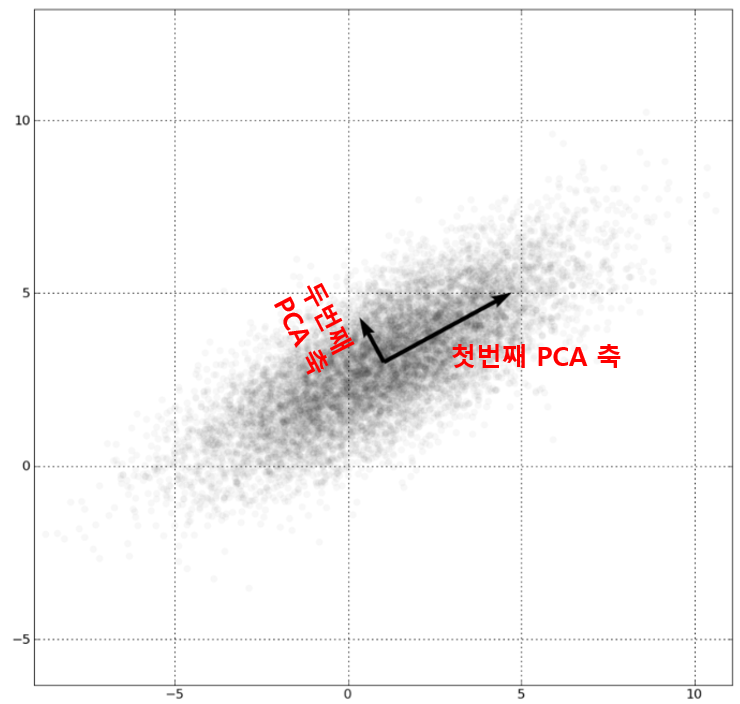

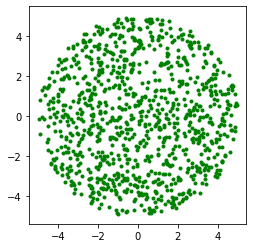

$$u = ax + by + cz + \cdots \\ ( a^2 + b^2 + c^2 + \cdots = 1 ) \tag{1}$$


a, b, c를 구하는 방법 = 분산의 최대

$\sum (개별값 - 평균)^2$ / (n-1)

$$\begin{eqnarray}
S_u^2 & = &{1 \over (n-1) }\{(u_1 - \bar u)^2 + (u_2 - \bar u)^2 + \cdots +  (u_n - \bar u)^2\} \\
& = & {1 \over (n-1)}[\{(ax_1+by_1+cz_1) - (a \bar x + b \bar y + c \bar z)    \}^2 \\
&& \quad \quad + \cdots + \{ (ax_n + by_n + c z_n)-( a \bar x + b \bar y + c\bar z) \}^2 ]\\
& = & {1 \over (n-1)}[\{a(x_1-\bar x)+b(y_1 - \bar y)+c(z_1 - \bar z) \}^2 \\
&& \quad \quad + \cdots + \{ a(x_n -\bar x)+b(y_n - \bar y)+c(z_n - \bar z)\}^2]
\end{eqnarray}$$
$$
$$
$$ $$
$$\therefore S_u^2 = a^2 S_x^2 + b^2 S_y^2 + c^2 S_z^2 + 2 abS_{xy} + 2 bc S_{yz} + 2ca S_{zx} \tag{2}
$$
$$ $$
$$a^2 + b^2 + c^2 = 1 \tag{3}
$$

라그랑주 승수법

$$ L = a^2 S_x^2 + b^2 S_y^2 + c^2 S_z^2 + 2 abS_{xy} + 2 bc S_{yz} + 2ca S_{zx} - \lambda (a^2 + b^2 + c^2 -1)$$

$$ {\partial L \over \partial a} = 2aS_x^2 + 2 b S_{xy} + 2 cS_{xz} - 2 \lambda a = 0$$
$$ {\partial L \over \partial b} = 2aS_{xy} + 2 b S_y^2 + 2 cS_{yz} - 2 \lambda b= 0$$
$$ {\partial L \over \partial c} = 2aS_{xz} + 2 b S_{yz} + 2 cS_z^2 - 2 \lambda c= 0$$

$$
\begin{pmatrix}
S_x^2 & S_{xy} & S_{xz} \\
S_{xy} & S_y^2 &  S_{yz} \\
S_{xz} & S_{yz} & S_z^2
\end{pmatrix}
\begin{pmatrix} a \\ b \\ c \end{pmatrix}
= \lambda \begin{pmatrix} a \\ b \\ c \end{pmatrix} \tag{4}
$$

$$AX = \lambda X \\
(A-\lambda I) X = 0 \\
\quad \\
$$

$$A = \begin{pmatrix} 1 & 2 \\ 4 & 3 \end{pmatrix} \ 의 \ 고유값,\ 고유벡터\ 구하기
$$

$$
| \ A - \lambda \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \ | = 0 \\
\quad \\
 \ \begin{vmatrix} 1-\lambda & 2 \\ 4 & 3-\lambda \end{vmatrix} \  =
 (1-\lambda)(3-\lambda) - 8 = 0 \\
 \quad \\
 \therefore \lambda = -1, 5 \\
\quad \\
i) \lambda = -1 \ 일때 \\
\quad \\
\begin{pmatrix} 2 & 2 \\ 4 & 4 \end{pmatrix} \begin{pmatrix}  x \\ y  \end{pmatrix} =  0 \\
\quad \\
\therefore x = -y \\
\quad \\
\lambda = 5 \ 일때도 \ 해보면, \\
\begin{pmatrix} x \\ y  \end{pmatrix} = \begin{pmatrix} 1 \\ -1  \end{pmatrix}, \ \begin{pmatrix} 1 \\ 2  \end{pmatrix}
$$

$\lambda$ = -1 일때, a, b 구하고

$\lambda$=5 일때, a, b 구하고

$$
\begin{pmatrix} a & b & c  \end{pmatrix}\begin{pmatrix}
S_x^2 & S_{xy} & S_{xz} \\
S_{xy} & S_y^2 &  S_{yz} \\
S_{xz} & S_{yz} & S_z^2
\end{pmatrix}
\begin{pmatrix} a \\ b \\ c \end{pmatrix} \\
= \begin{pmatrix} aS_x^2+bS_{xy}+cS_{xz} \quad aS_{xy}+bS_y^2+cS_{yz} \quad aS_{xz}+bS_{yz}+cS_z^2 \end{pmatrix}
\begin{pmatrix} a \\ b \\ c \end{pmatrix} \\
 =  a^2S_x^2+abS_{xy}+acS_{xz}+abS_{xy}+b^2S_y^2+bcS_{yz}+acS_{xz}+bcS_{yz}+c^2S_z^2 \\
=  a^2S_x^2 + b^2S_y^2+c^2S_z^2+2abS_{xy}+2bcS_{yz}+2acS_{xz} \\
 =  S_u^2
$$

이므로,

$$ S_u^2
= \begin{pmatrix} a & b & c  \end{pmatrix}
\lambda \begin{pmatrix} a \\ b \\ c \end{pmatrix} \\
=  \lambda (a^2 + b^2 + c^2) = \lambda $$

$$ $$
$$ \therefore S_u^2 = \lambda $$

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
columns = ['sepal_length','sepal_width','petal_length','petal_width']

In [ ]:
irisDF = pd.DataFrame(iris.data, columns = columns)

In [ ]:
irisDF['target']= iris.target

In [ ]:
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


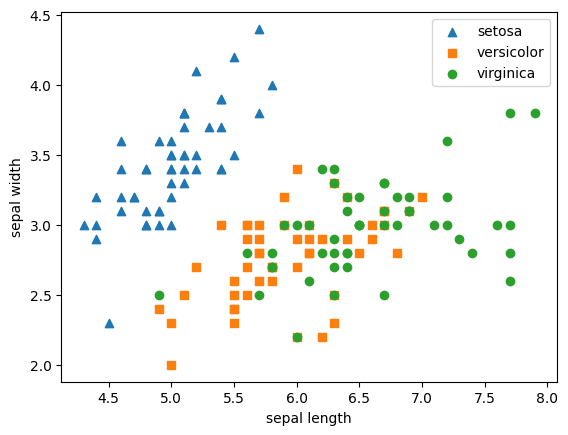

In [ ]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(iris_scaled)

PCA(n_components=2)

In [ ]:
iris_pca = pca.transform(iris_scaled)

In [ ]:
iris_pca.shape

(150, 2)

In [ ]:
irisDF.shape

(150, 5)

In [ ]:
irisDF_pca = pd.DataFrame(iris_pca, columns=['pca_component_1', 'pca_component_2'])

In [ ]:
irisDF_pca['target'] = iris.target

In [ ]:
irisDF_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


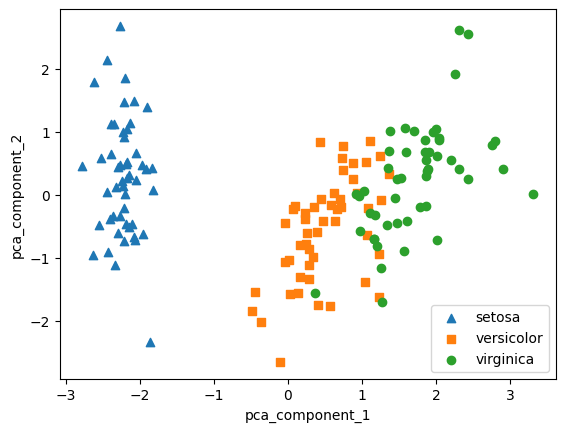

In [ ]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
rf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rf, iris.data, iris.target, scoring='accuracy', cv=3)
scores

array([0.98, 0.94, 0.96])

In [ ]:
np.mean(scores)

0.96

In [ ]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rf, pca_X, iris.target, scoring='accuracy', cv=3)
scores_pca

array([0.88, 0.88, 0.88])

In [ ]:
ls ./drive/MyDrive/data/cr*

./drive/MyDrive/data/creditcard.csv  ./drive/MyDrive/data/credit_card.xls


In [ ]:
df = pd.read_excel('./drive/MyDrive/data/credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.shape

(30000, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [ ]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month': 'default'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [ ]:
y_target = df['default']

In [ ]:
y_target.shape

(30000,)

In [ ]:
X_features = df.iloc[:, :-1]

In [ ]:
X_features.shape

(30000, 23)

In [ ]:
import seaborn as sns
corr = X_features.corr()

<Axes: >

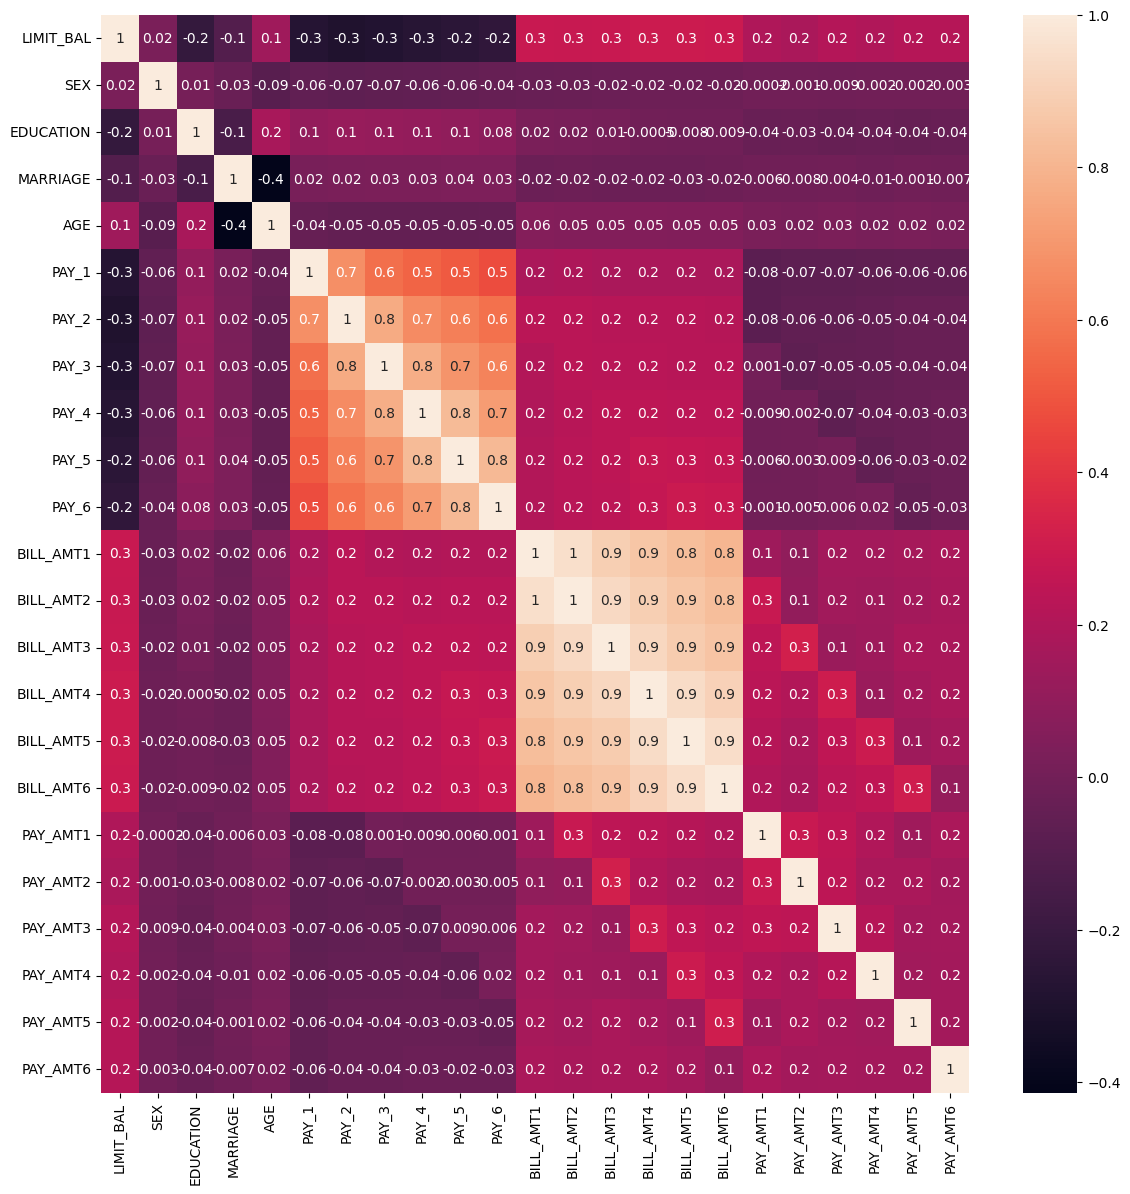

In [ ]:
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [ ]:
cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]

In [ ]:
cols_bill

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

In [ ]:
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

In [ ]:
df_cols_scaled

array([[-0.64250107, -0.64739923, -0.66799331, -0.67249727, -0.66305853,
        -0.65272422],
       [-0.65921875, -0.66674657, -0.63925429, -0.62163594, -0.60622927,
        -0.59796638],
       [-0.29855966, -0.49389911, -0.48240819, -0.44973025, -0.41718767,
        -0.39162956],
       ...,
       [-0.64722711, -0.64383044, -0.63815838, -0.34796096, -0.32451732,
        -0.32768664],
       [-0.71798186,  0.41026929,  0.42237335,  0.14784373, -0.46806261,
         0.16913036],
       [-0.04473888, -0.00385085,  0.03966713, -0.10458204, -0.12966943,
        -0.39559241]])

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(df_cols_scaled)
pca.explained_variance_ratio_

array([0.90555253, 0.0509867 ])

In [ ]:
cols_pay = ['PAY_'+str(i) for i in range(1, 7)]

In [ ]:
cols_pay

['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [ ]:
cols_pay_df = scaler.fit_transform(X_features[cols_pay])

In [ ]:
cols_pay_df

array([[ 1.79456386,  1.78234817, -0.69666346, -0.66659873, -1.53004603,
        -1.48604076],
       [-0.87499115,  1.78234817,  0.1388648 ,  0.18874609,  0.23491652,
         1.99231551],
       [ 0.01486052,  0.1117361 ,  0.1388648 ,  0.18874609,  0.23491652,
         0.25313738],
       ...,
       [ 3.57426721,  2.61765421,  1.8099213 , -0.66659873,  0.23491652,
         0.25313738],
       [ 0.90471219, -0.72356993,  0.1388648 ,  0.18874609,  0.23491652,
        -0.61645169],
       [ 0.01486052,  0.1117361 ,  0.1388648 ,  0.18874609,  0.23491652,
         0.25313738]])

In [ ]:
pca = PCA(n_components=2)
pca.fit(cols_pay_df)
pca.explained_variance_ratio_

array([0.71645838, 0.11674569])

1. 피쳐 23개 -> 6개로 차원 축소 -> RandomForestClassifier 의 정확도 구해 주세요.

2. 피쳐 23개 그대로 사용 -> RandomForestClassifier 의 정확도 구해 주세요.

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [ ]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [ ]:
X_features.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [ ]:
y_target

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: int64

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, random_state=156)

In [ ]:
scores = cross_val_score(rf, X_features, y_target, scoring='accuracy', cv=3)

In [ ]:
scores, np.mean(scores)

(array([0.8086, 0.8206, 0.823 ]), 0.8174)

In [ ]:
pca = PCA(n_components=6)
X_features_pca = pca.fit_transform(X_features)
rf = RandomForestClassifier(n_estimators=1000, random_state=156)
scores = cross_val_score(rf, X_features_pca, y_target, scoring='accuracy', cv=3)
scores, np.mean(scores)

(array([0.7723, 0.7813, 0.7824]), 0.7786666666666666)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)
pca = PCA(n_components=6)
X_scaled_pca = pca.fit_transform(X_scaled)
rf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rf, X_scaled_pca, y_target, scoring='accuracy', cv=3)
scores, np.mean(scores)

(array([0.7911, 0.7985, 0.8028]), 0.7974666666666667)

# LDA (Linear Discriminant Analysis)

: 데이터를 잘 분리해 낼 수 있는 축을 찾는다.

- 클래스간 거리는 최대화 시키고

- 같은 클래스에서의 내부 분산은 최소화 시키는 방식으로 찾음

https://sebastianraschka.com/Articles/2014_python_lda.html

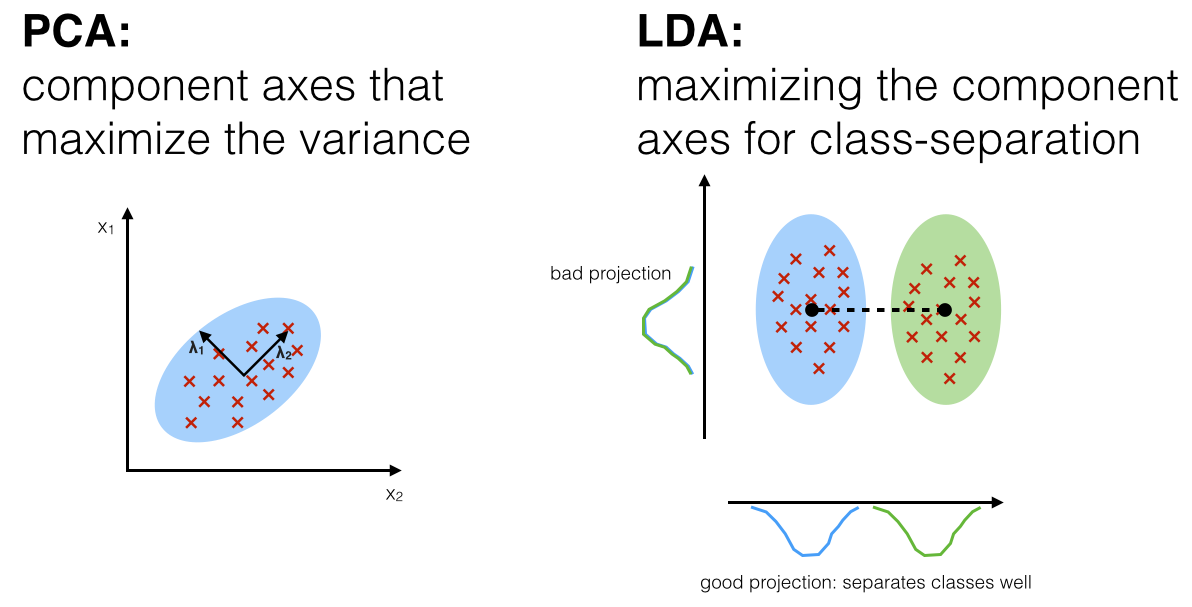

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
iris = load_iris()

In [ ]:
iris_scaled = StandardScaler().fit_transform(iris.data)

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [ ]:
lda.fit(iris_scaled, iris.target)

LinearDiscriminantAnalysis(n_components=2)

In [ ]:
iris_lda = lda.transform(iris_scaled)

In [ ]:
iris_lda.shape

(150, 2)

In [ ]:
lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

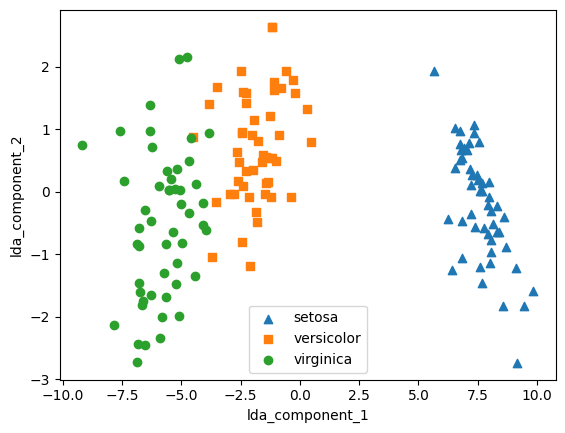

In [ ]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

In [ ]:
irisDF_lda.head()

,lda_component_1,lda_component_2,target
0,8.061800,-0.300421,0
1,7.128688,0.786660,0
2,7.489828,0.265384,0
3,6.813201,0.670631,0
4,8.132309,-0.514463,0


In [ ]:
lda_columns

['lda_component_1', 'lda_component_2']

In [ ]:
rf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rf, irisDF_lda[lda_columns], iris.target, scoring='accuracy', cv=3)
scores, np.mean(scores)

(array([1.  , 0.9 , 0.94]), 0.9466666666666667)

#LDA 예제 - LDA 변환후에 값을 2차원 그래프로 그려보기

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
x, y = make_classification(n_samples=500, n_features=2, n_informative=1, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=156)

In [ ]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((375, 2), (125, 2), (125,), (375,))

In [ ]:
scaler = StandardScaler().fit(X_train)

In [ ]:
train_scaled = scaler.transform(X_train)
test_scaled = scaler.transform(X_test)

In [ ]:
clf= LinearDiscriminantAnalysis()
clf.fit(train_scaled, y_train)
train_lda = clf.transform(train_scaled)
test_lda = clf.transform(test_scaled)

In [ ]:
train_lda.shape

(375, 1)

In [ ]:
test_lda.shape

(125, 1)

In [ ]:
slope = clf.coef_[0, 1]/clf.coef_[0,0]

In [ ]:
slope

0.02133067427494497

In [ ]:
t = np.arange(np.min(X[:, 0]), np.max(X[:, 0]), 0.1)

Text(0.5, 1.0, 'test data')

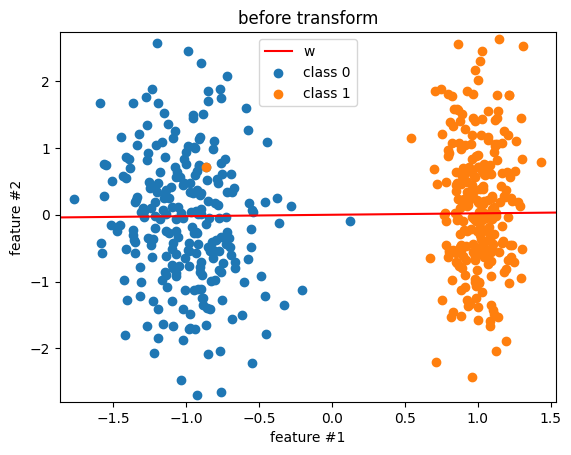

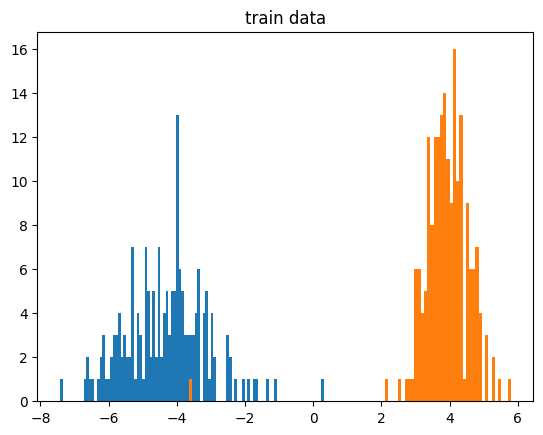

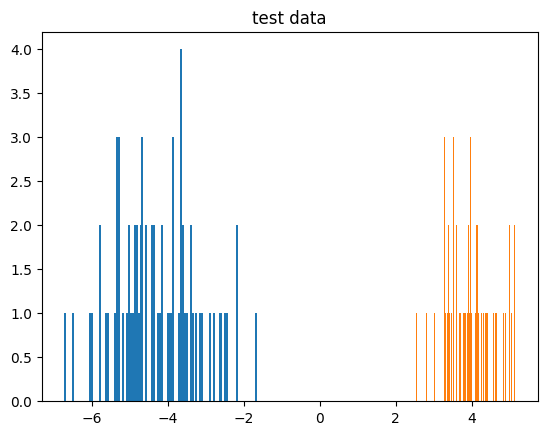

In [ ]:
label0 = y==0
label1 = y==1
# plt.subplot(1,3,1)
plt.plot(t, slope*t, color='red')
plt.scatter(x[label0,0], x[label0,1])
plt.scatter(x[label1,0], x[label1,1])
plt.xlim(np.min(x[:,0])-0.1, np.max(x[:,0])+0.1)
plt.ylim(np.min(x[:,1])-0.1, np.max(x[:,1])+0.1)
plt.xlabel('feature #1')
plt.ylabel('feature #2')
plt.legend(labels=['w', 'class 0', 'class 1'])
plt.title('before transform')

plt.figure()
plt.hist(train_lda[y_train==0], 100)
plt.hist(train_lda[y_train==1], 100)
plt.title('train data')

plt.figure()
plt.hist(test_lda[y_test==0], 100)
plt.hist(test_lda[y_test==1], 100)
plt.title('test data')

#SVD (Singular value decomposition) : 행렬분해


: np.linalg.svd

: scipy.linalg.svd

:Truncated SVD (분해된 행렬의 일부분만 사용)

$ 3717 = 3*3*7*59$

$15 x^3 + 16x^2-x-2 = (3x-1)(5x+2)(x+1)$

고유값 분해

# $$A = Q \boldsymbol{\Lambda} Q^{-1} \\
\boldsymbol{\Lambda} \ : \ 고유값을\ 대각선에\ 배치한\ 대각\ 행렬
 $$

고유값과 고유벡터의 조합으로 행렬분해

# $$A = U \boldsymbol{\Sigma} V^T$$

A A.T 와 A.T A 의 고유값과 고유벡터의 조합으로 행렬분해

In [ ]:
from numpy.linalg import svd

In [ ]:
np.random.seed(121)
a = np.random.randn(4, 4)

In [ ]:
np.round(a,3)

array([[-0.212, -0.285, -0.574, -0.44 ],
       [-0.33 ,  1.184,  1.615,  0.367],
       [-0.014,  0.63 ,  1.71 , -1.327],
       [ 0.402, -0.191,  1.404, -1.969]])

In [ ]:
U, Sigma, Vt = svd(a)

In [ ]:
U.shape, Sigma.shape, Vt.shape

((4, 4), (4,), (4, 4))

In [ ]:
np.round(Sigma, 3)

array([3.423, 2.023, 0.463, 0.079])

In [ ]:
Sigma_mat = np.diag(Sigma)

In [ ]:
Sigma_mat

array([[3.4229581 , 0.        , 0.        , 0.        ],
       [0.        , 2.02287339, 0.        , 0.        ],
       [0.        , 0.        , 0.46263157, 0.        ],
       [0.        , 0.        , 0.        , 0.07935069]])

In [ ]:
np.round(U, 3)

array([[-0.079, -0.318,  0.867,  0.376],
       [ 0.383,  0.787,  0.12 ,  0.469],
       [ 0.656,  0.022,  0.357, -0.664],
       [ 0.645, -0.529, -0.328,  0.444]])

In [ ]:
np.round(Vt, 3)

array([[ 0.041,  0.224,  0.786, -0.574],
       [-0.2  ,  0.562,  0.37 ,  0.712],
       [-0.778,  0.395, -0.333, -0.357],
       [-0.593, -0.692,  0.366,  0.189]])

In [ ]:
a_ = np.dot(np.dot(U, Sigma_mat),Vt)

In [ ]:
np.round(a, 3)

array([[-0.212, -0.285, -0.574, -0.44 ],
       [-0.33 ,  1.184,  1.615,  0.367],
       [-0.014,  0.63 ,  1.71 , -1.327],
       [ 0.402, -0.191,  1.404, -1.969]])

In [ ]:
np.round(a_, 3)

array([[-0.212, -0.285, -0.574, -0.44 ],
       [-0.33 ,  1.184,  1.615,  0.367],
       [-0.014,  0.63 ,  1.71 , -1.327],
       [ 0.402, -0.191,  1.404, -1.969]])

In [ ]:
a[2] = a[0] + a[1]
a[3] = a[0]

In [ ]:
np.round(a, 3)

array([[-0.212, -0.285, -0.574, -0.44 ],
       [-0.33 ,  1.184,  1.615,  0.367],
       [-0.542,  0.899,  1.041, -0.073],
       [-0.212, -0.285, -0.574, -0.44 ]])

In [ ]:
U, Sigma, Vt = svd(a)

In [ ]:
U.shape, Sigma.shape, Vt.shape

((4, 4), (4,), (4, 4))

In [ ]:
np.round(Sigma,3)

array([2.663, 0.807, 0.   , 0.   ])

In [ ]:
Sigma_mat = np.diag(Sigma)

In [ ]:
np.round(Sigma_mat,3)

array([[2.663, 0.   , 0.   , 0.   ],
       [0.   , 0.807, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ]])

In [ ]:
a_ = np.dot(np.dot(U, Sigma_mat), Vt)

In [ ]:
np.round(a_, 3)

array([[-0.212, -0.285, -0.574, -0.44 ],
       [-0.33 ,  1.184,  1.615,  0.367],
       [-0.542,  0.899,  1.041, -0.073],
       [-0.212, -0.285, -0.574, -0.44 ]])

In [ ]:
np.round(a, 3)

array([[-0.212, -0.285, -0.574, -0.44 ],
       [-0.33 ,  1.184,  1.615,  0.367],
       [-0.542,  0.899,  1.041, -0.073],
       [-0.212, -0.285, -0.574, -0.44 ]])

Sigma 의 원소가 2개만 0이 아니므로

U, Vt 도 2개 원소만 사용해보자

-> shape 고려

In [ ]:
U_ = U[:, :2]
Vt_ = Vt[:2]
Sigma_ = np.diag(Sigma[:2])

In [ ]:
U_.shape, Sigma_.shape, Vt_.shape

((4, 2), (2, 2), (2, 4))

In [ ]:
a_ = np.dot(np.dot(U_, Sigma_), Vt_)

In [ ]:
np.round(a_, 3)

array([[-0.212, -0.285, -0.574, -0.44 ],
       [-0.33 ,  1.184,  1.615,  0.367],
       [-0.542,  0.899,  1.041, -0.073],
       [-0.212, -0.285, -0.574, -0.44 ]])

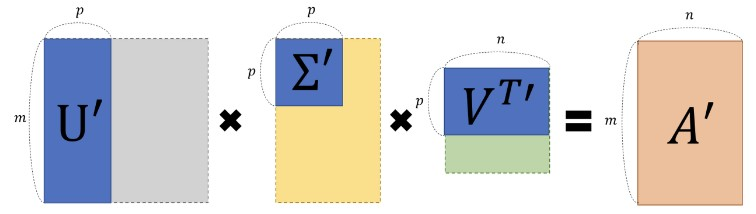

In [ ]:
from scipy.sparse.linalg import svds
from scipy.linalg import svd

In [ ]:
np.random.seed(121)
matrix = np.random.random((6, 6))
matrix

array([[0.11133083, 0.21076757, 0.23296249, 0.15194456, 0.83017814,
        0.40791941],
       [0.5557906 , 0.74552394, 0.24849976, 0.9686594 , 0.95268418,
        0.48984885],
       [0.01829731, 0.85760612, 0.40493829, 0.62247394, 0.29537149,
        0.92958852],
       [0.4056155 , 0.56730065, 0.24575605, 0.22573721, 0.03827786,
        0.58098021],
       [0.82925331, 0.77326256, 0.94693849, 0.73632338, 0.67328275,
        0.74517176],
       [0.51161442, 0.46920965, 0.6439515 , 0.82081228, 0.14548493,
        0.01806415]])

In [ ]:
U, Sigma, Vt= svd(matrix, full_matrices=False)
U.shape, Sigma.shape, Vt.shape

((6, 6), (6,), (6, 6))

In [ ]:
num_components=4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
U_tr.shape, Sigma_tr.shape, Vt_tr.shape

((6, 4), (4,), (4, 6))

In [ ]:
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)

In [ ]:
matrix_tr

array([[0.19222941, 0.21792946, 0.15951023, 0.14084013, 0.81641405,
        0.42533093],
       [0.44874275, 0.72204422, 0.34594106, 0.99148577, 0.96866325,
        0.4754868 ],
       [0.12656662, 0.88860729, 0.30625735, 0.59517439, 0.28036734,
        0.93961948],
       [0.23989012, 0.51026588, 0.39697353, 0.27308905, 0.05971563,
        0.57156395],
       [0.83806144, 0.78847467, 0.93868685, 0.72673231, 0.6740867 ,
        0.73812389],
       [0.59726589, 0.47953891, 0.56613544, 0.80746028, 0.13135039,
        0.03479656]])

#사이킷런의 TruncatedSVD 을 사용한 변환

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA

In [ ]:
iris = load_iris()

In [ ]:
iris_ftrs = iris.data

In [ ]:
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

Text(0, 0.5, 'TruncatedSVD Component 2')

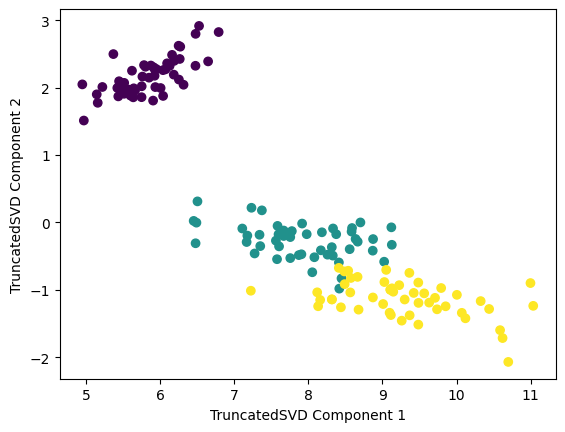

In [ ]:
plt.scatter(x=iris_tsvd[:, 0], y = iris_tsvd[:, 1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

In [ ]:
scaler = StandardScaler()

In [ ]:
iris_scaled = scaler.fit_transform(iris_ftrs)

In [ ]:
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

In [ ]:
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

Text(0.5, 1.0, 'PCA')

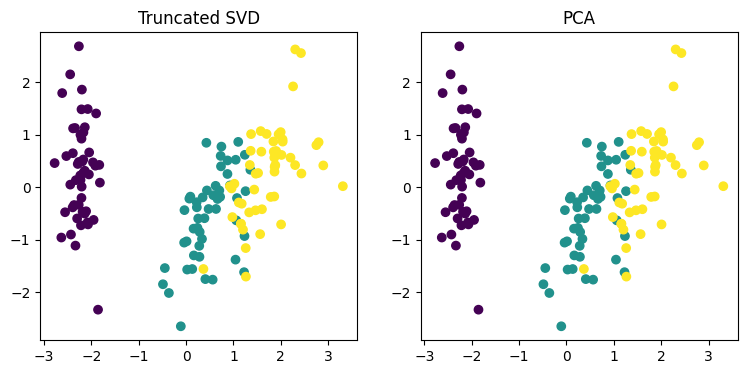

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
ax2.scatter(x=iris_pca[:, 0], y=iris_pca[:, 1], c=iris.target)
ax1.set_title('Truncated SVD')
ax2.set_title('PCA')